<a href="https://colab.research.google.com/github/ClaudioFritzen/Churn1/blob/main/Modelo_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> MODELO DE CHURN

** 1. Indrodução**
  Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar decisões.
  "Seus clientes mais insastifeitos são sua maior fonte de aprendizado (Bill Gates)."
  A taxa de retenção de clientes é um bom indicativo de qualidadedo do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn.
  Mas quais são as características que leva um cliente a dar um Churn?
  Na parte I, desse tutorial, entendemos o problema de Churn e estabelecemos o objetivo, identificar o perfil e prever os clientes em risco de Churn.
  Agora na parte II daremos contunuidade a análise e para isso utilizaremos um conjunto de dados de uma agência bancária.
  Recordando, para esse projeto de Data Science seguiremos essas etapas.
  * Entendimento de Problema 
  * Obtenção dos dados 
  * Análise Exploratória e Visualização dos dados
  * Pré-processamento 
  * Modelo de Machine Learning 
  * Avaliação do modelo.

2.Coletas de dados

In [8]:
import pandas as pd

import numpy as np # pacote algebra linear;
import seaborn as sns # visualização de dados;
import matplotlib as plt

In [9]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


>3. EDA

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


pega o meu conjunto de dado e fazer um grafico

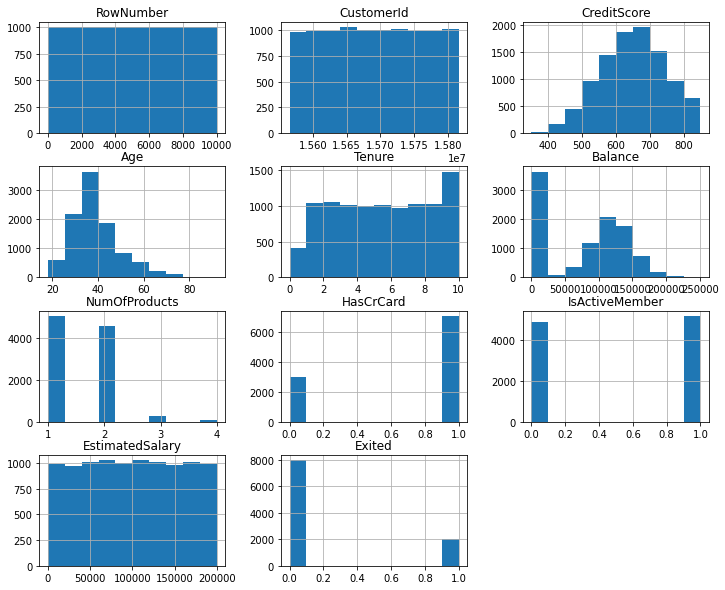

In [11]:
df.hist(figsize=(12,10));


**D. Vizualização de Dados - Qual o perfil de clientes que cancelaram o contrato (CHURN)?**

In [12]:

#import numpy as np # pacote algebra linear;
#import seaborn as sns # visualização de dados;
#import matplotlib as plt

In [13]:
# aqui podemos definir as cores que iram aparecer no grafico aqui as cores estao em RGB
myred = '#CD5C5C'
myblue = '#6495ED'
mygreen = '#90EE90'
cols = [myred, myblue, mygreen]

In [14]:
# porcentagem de clientes que saíram do banco
df['Exited'].sum()/df['Exited'].count() 
#aqui a conta sera somar todas os clientes que sairam, e dividir por todos para saber
# a porcentagem do Insatisfação

0.2037

> Variáveis Categóricas

Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Exited). Utilizaremos gráficos de barras para esse fim.


  * Variável Sexo (GENDER) 

In [15]:
#remoneando as categorias 

# nessa linha iremos renomear a coluna "gender" para sexo. so pra ficar mais facil de entender
df['Gender']=df['Gender'].replace(['Female','Male'], ['Feminino','Masculino'])


In [16]:
df_plot = df.groupby ('Gender'). Exited.mean (). reset_index ()
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


In [17]:
#Sexo em relação a variável churn
x=df_plot['Gender']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn')
# na aula da FLAI ao vivo nao declararão essa variavel "plt"

AttributeError: ignored

Observa-se que as mulheres têm um risco de Churn do que os homens.

> ° Variável País



In [18]:
df['Geography'] = df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])
df_plot = df.groupby ('Geography').Exited.mean().reset_index()
df_plot

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


In [19]:
# Pais em relação a varialvel churn
x = df_plot['Geography']
y = df_plot['Exited']

plt.barplot(x,y, color=cols);
#plt.bar(x,y, color=cols);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

AttributeError: ignored

  Em relação a variável país, observa-se que a porcentagem de Churn na Alemanha é bastante elevada,
onde 32% dos clientes encerraram a conta no banco. Espanha e França têm uma taxa de Churn em torno de 16%
> Variável Cartão de Crédito

In [20]:
df['HasCrCard']=df['HasCrCard'].replace([0,1],['Não','Sim'])

In [21]:
df_plot = df.groupby ('HasCrCard'). Exited.mean (). reset_index ()
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


In [22]:
#Cartão de Credito em relação a variável churn
x =df_plot['HasCrCard']
y =df_plot['Exited']
plt.bar(x,y)

AttributeError: ignored

Observe que o cliente ter ou não cartão de crédito parece não influenciar no Churn.


> Variável Membro Ativo


In [28]:

df['IsActiveMember'] = df['IsActiveMember'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('IsActiveMember'). Exited.mean (). reset_index ()
# Membro ativo em relação a variável Chrun
x = df_plot['IsActiveMember']
y = df_plot['Exited'] 
ptl.bar(x,y,color=cols);
ptl.title('Taxa de Churn em relação a variavel Membro Ativo');
ptl.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');



NameError: ignored

O Churn entre os clientes que não são ativos, tendo uma diferença de aproxidamente 12%.
Variaveis númericas para as variáveis numéricas utilizaremos variáveis de barras discretas e gráfico de dispersão e box-plot para as variáveis contínuas. Também analisaremos a matriz de correlação para ver a correlação entre as variáveis.
Selecionamos, primeiramente,apenas as variáveis numericas.

In [26]:
#box- plot saldo bancario em relação ao Churn
cols = [myred, myblue, mygreen]
sns.boxplot(x = "Exited_cat", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancario');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df.groupby(['Exited_cat'])['Balance'].mean()

ValueError: ignored

In [25]:
#box-plot Idade pelo Churn
sns.boxplot(x="Exited_cat", y="Age", data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade')
df.groupby(['Exited'])['Age'].mean()

ValueError: ignored

Analisando o historico de clientes, observamos algumas caracteristicas entre os clientes que cancelaram o serviço.
Observa-se que clientes da Alemanha, do sexo feminino, que não são membro ativo, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.




> 4. Pré Processamento
Alguns algoritimos de machine learning não aceitam variáveis categoricas e por isso precisamos utilizar técnicas para converter as classes em números.
Ou seja, convertemos as colunas categóricas simplesmente atribuindo números inteiros a classes distintas.
Para as variaveis com apenas duas classes utilizaremos a função Label Encoder para converte colunas categoricas em numericas simplemente atribuindo números inteiros e valores distintos.
Por Exemplo, a coluna sexo tem dois valores:Feminino e masculino. Após aplicar a função, os valores serão transformados em 0 e 1.



In [24]:
df1 = df.drop(columns= ['RowNumber','CustomerId','Surname', 'Exited_cat'])
df1

KeyError: ignored

> Dados faltantes

In [29]:
# Contato número de observação faltantes no dataset para variável
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
y = df1['Exited']
X = df1
X = df1.drop('Exited',axis = 1)
X

In [ ]:
#variaveis Continuas
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
x_cont

In [ ]:
#variaveis categoricas
x_cat =list(set(X)-set(x_cont))
x_cat
x_dummies = x[x_cat]
x_dummies

In [ ]:
#substituindo a variavel sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X.head(10)

In [37]:
x_final = pd.get_dummies (data= X, columns=['Geography','NumOfProducts','HasCrCard'])
x_final

NameError: ignored

In [38]:
# Separado em dados teste e treinamento
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino,y_teste = train_test_split(x_final, y, test_size=0.25,random_state= 1)
x_treino

NameError: ignored

5. MODELO

In [39]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier() #nunca faça isso!!!
modelo.fit(x_treino,y_treino)

NameError: ignored

>6.Ajuste

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=61658)

params = {
    'criterion' : ['gini', 'entropy'], 'max_depth' : [2,3,4,5,6,7,8,9],
}
grid = GridSearchCV(
    cv=10,
    scoring='roc_auc',
    verbose=10,
    n_jobs=1
)
grid.fit(x_treino, y_treino)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_teste, grid.predict_proba(x_teste)[:,1])

In [ ]:
df['proba'] = grid.predict_proba(x_final[x_treino.columns])[:,1]
df_pred = df[['CustomerId', 'proba']]
df_pred

In [ ]:
df_pred.sort_values('proba', ascending=False)